# Zillow

## Exploratory Analysis of Zillow Data

In [9]:
import numpy as np
import pandas as pd

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format

# Split 
from sklearn.model_selection import train_test_split

# Scale
from sklearn.preprocessing import MinMaxScaler

# Stats
import scipy.stats as stats

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#My Files
import env
from wrangle_zillow import *

Can leave unscaled for exploration, but scale before modeling!!


In [46]:
# aquire zillow data using function from wrangle_zillow
df = wrangle_zillow()
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.50,4.00,6.00,3100.00,6059.00,33634931.00,-117869207.00,4506.00,60590630.07,...,0.00,1998.00,485713.00,1023282.00,2016.00,537569.00,11013.72,0.03,2017-01-01,Orange
1,17052889,1.00,2.00,6.00,1465.00,6111.00,34449266.00,-119281531.00,12647.00,61110010.02,...,5.00,1967.00,88000.00,464000.00,2016.00,376000.00,5672.48,0.06,2017-01-01,Ventura
2,14186244,2.00,3.00,6.00,1243.00,6059.00,33886168.00,-117823170.00,8432.00,60590218.02,...,6.00,1962.00,85289.00,564778.00,2016.00,479489.00,6488.30,0.01,2017-01-01,Orange
3,12177905,3.00,4.00,8.00,2376.00,6037.00,34245180.00,-118240722.00,13038.00,60373001.00,...,0.00,1970.00,108918.00,145143.00,2016.00,36225.00,1777.51,-0.10,2017-01-01,Los Angeles
6,12095076,3.00,4.00,9.00,2962.00,6037.00,34145202.00,-118179824.00,63000.00,60374608.00,...,0.00,1950.00,276684.00,773303.00,2016.00,496619.00,9516.26,-0.00,2017-01-01,Los Angeles


In [47]:
# split data using function from
train, validate, test = split_data(df)

In [12]:
# scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [14]:
# train_scaled.head()

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#### Notes: 

target = logerror

log_error = difference of log(Zestimate) and log(SalePrice)

Q: Why did Zillow pick the log error instead of an absolute error metric such as RMSE?

Home sale prices have a right skewed distribution and are also strongly heteroscedastic, so we need to use a relative error metric instead of an absolute metric to ensure valuation models are not biased towards expensive homes. A relative error metric like the percentage error or log ratio error avoids these problems. While we report Zestimate errors in terms of percentages on Zillow.com because we believe that to be a more intuitive metric for consumers, we do not advocate using percentage error to evaluate models in Zillow Prize, as it may lead to biased models The log error is free of this bias problem and when using the natural logarithm, errors close to 1 approximate percentage errors quite closely. See this paper for more on relative errors and why log error should be used instead of percentage error.

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2635088

#### Questions: 

1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
2. 
3. 
4. 
5. 

In [44]:
train.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
count,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,...,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00
mean,12947269.09,2.28,3.30,6.16,1899.37,6049.14,34024104.39,-118193863.72,11306.04,60494472.00,...,2525.41,96629.80,1.90,1963.21,186578.14,493449.33,2016.00,306871.19,6028.58,0.02
std,1950481.77,0.98,0.93,1.37,938.98,21.05,274310.86,356191.60,88440.99,208918.38,...,803.53,4373.09,3.14,23.02,196723.79,502157.07,0.00,357883.45,5789.82,0.17
min,10711855.00,1.00,1.00,1.00,300.00,6037.00,33340620.00,-119475265.00,236.00,60371011.10,...,1286.00,95982.00,0.00,1880.00,148.00,3254.00,2016.00,161.00,49.18,-4.66
25%,11502542.00,2.00,3.00,6.00,1263.00,6037.00,33827385.00,-118399974.00,5595.00,60374008.00,...,1286.00,96208.00,0.00,1950.00,76088.00,190372.00,2016.00,74077.00,2610.70,-0.02
50%,12576262.00,2.00,3.00,6.00,1650.00,6037.00,34025724.00,-118153327.00,6795.00,60376037.02,...,3101.00,96412.00,0.00,1960.00,130000.00,369000.00,2016.00,214625.00,4594.88,0.01
75%,14129435.00,3.00,4.00,7.00,2290.00,6059.00,34189058.00,-117930191.00,8720.00,60590423.27,...,3101.00,96995.00,5.00,1979.00,223152.00,609149.00,2016.00,402000.00,7272.74,0.04
max,162960596.00,10.00,12.00,12.00,11020.00,6111.00,34818767.00,-117554636.00,6971010.00,61110091.00,...,3101.00,399675.00,14.00,2016.00,3316500.00,4993132.00,2016.00,4847224.00,59247.88,3.39


In [43]:
train.logerror.describe()

count   29089.00
mean        0.02
std         0.17
min        -4.66
25%        -0.02
50%         0.01
75%         0.04
max         3.39
Name: logerror, dtype: float64

In [26]:
train.county.head()

61675    Los Angeles
7581     Los Angeles
48630    Los Angeles
66151        Ventura
38789         Orange
Name: county, dtype: object

In [35]:
train.logerror.head()

61675   0.01
7581    0.42
48630   0.04
66151   0.02
38789   0.01
Name: logerror, dtype: float64

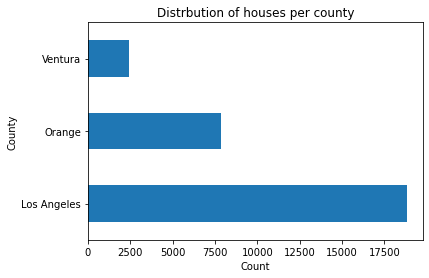

In [34]:
train.county.value_counts().plot.barh()
plt.title('Distrbution of houses per county')
plt.ylabel('County')
plt.xlabel('Count')
plt.show()

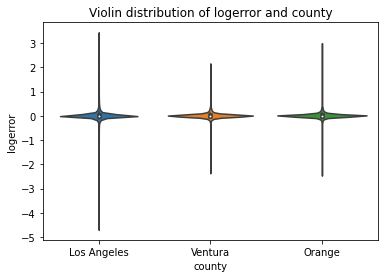

In [36]:
sns.violinplot(data=train, y='logerror', x='county')
plt.title('Violin distribution of logerror and county')
plt.show()

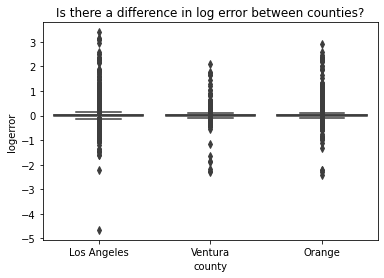

In [42]:
sns.boxplot(data=train, y='logerror', x='county')
plt.title("Is there a difference in log error between counties?")
plt.show()

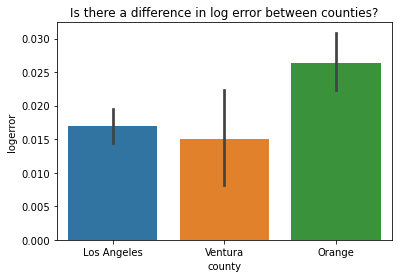

In [40]:
sns.barplot(data=train, y='logerror', x='county')
plt.title("Is there a difference in log error between counties?")
plt.show()


Question 1: 

Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Orange county has a greater log error than L.A. and Ventura counties; Ventura having the lowest log error. The mean log error is 0.02. L.A. and Ventura are below the average and Orange County is above the average log error. 

2. Answer those questions through a mix of statistical tests and visualizations.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.